In [1]:
import numpy, random, math
from scipy.optimize import minimize
import matplotlib . pyplot as plt

In [2]:
def kernel_linear(x,y):
    return numpy.dot(x,y)

In [3]:
def kernel_polynomial(p):
    return lambda x, y:(numpy.dot(x,y) + 1) ** p 

In [20]:
def kernel_radial(sigma):
    return lambda x, y: numpy.exp((-numpy.linalg.norm(x-y) ** 2) / (2*(sigma ** 2)))

In [5]:
x = numpy.array([[1,2],[3,2],[3,4]])
y = numpy.array([4,5,6])
x2 = numpy.ones((10, 2))

#numpy.dot(x[:,None],y[None])
#numpy.einsum('i,j->ij',x,x)




he


In [6]:
%%javascript
Jupyter.keyboard_manager.edit_shortcuts.add_shortcut('cmd-shift-d', {
    help: 'Duplicate current line',
    help_index: 'zz',
    handler: function (env) {
        var cm = env.notebook.get_selected_cell().code_mirror;
        // get a position of a current cursor in a current cell
        var current_cursor = cm.doc.getCursor();

        // read a content from a line where is the current cursor
        var line_content = cm.doc.getLine(current_cursor.line);
        cm.execCommand('goLineEnd');
        cm.execCommand('newlineAndIndent');
        cm.execCommand('indentLess');
        cm.doc.replaceSelection(line_content);
        cm.doc.setCursor(current_cursor.line + 1, current_cursor.ch);
        return false;
    }
}
);

<IPython.core.display.Javascript object>

In [7]:
def generateP(t, x, kernel):
    matrix = []
    i = 0
    for i in range(len(x)):
        row = []
        for j in range(len(x)):
            row.append(t[i] * t[j] * kernel(x[i], x[j]))
        matrix.append(row)
    #print(matrix)
    return numpy.array(matrix)
    
    
    
generateP(numpy.array([1, -1]), numpy.array([[1, 1], [1, 2]]), kernel_linear)

array([[ 2, -3],
       [-3,  5]])

In [8]:
alpha = numpy.ones((2, 1))

def objective(t, x, kernel):
    P = generateP(t, x, kernel)
    return lambda alpha : 0.5 * numpy.sum(numpy.multiply(numpy.dot(alpha[:, None], alpha.T[None]), P)) - numpy.sum(alpha)
#print(objective(t, x))

In [9]:

def zerofun(t):
    return lambda alpha : numpy.dot(t,alpha)

Test data!

In [74]:
numpy.random.seed(50)
classA = numpy.concatenate((numpy.random.randn(10, 2) * 0.2 + [2, -1.5],
                            numpy.random.randn(10, 2) * 0.2 + [-2, 0],
                            numpy.random.randn(5, 2) * 0.5 + [0, 0],
                           
                           ))
#classA = numpy.array([[0, 0], [1 ,0]])
classB = numpy.random.randn(40, 2) * 0.2 + [0.0 , 0.2]
#classB = numpy.array([[4, 0], [3 ,0]])
inputs = numpy.concatenate(( classA , classB))
targets = numpy.concatenate((numpy.ones(classA.shape[0]), -numpy.ones(classB.shape[0])))

N = inputs.shape[0] # Number of rows (samples)
permute=list(range(N))
random.shuffle(permute)
inputs = inputs[permute,:]
targets = targets[permute]

print(inputs.shape)
print(targets.shape)


(65, 2)
(65,)


Plot time!

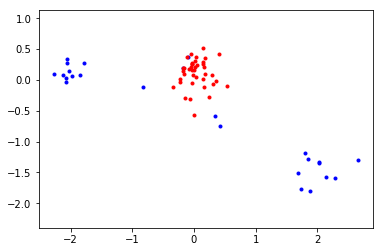

In [75]:
plt.plot([p[0] for p in classA],
        [p[1] for p in classA],
        'b.')

plt.plot([p[0] for p in classB],
        [p[1] for p in classB],
        'r.')

plt.axis('equal')
plt.savefig('svmplot.pdf')
plt.show()

Create the model

In [96]:

t = targets
x = inputs
start = numpy.zeros(N)
c = 1
XC={'type':'eq', 'fun':zerofun(t)}
B=[(0, c) for b in range(N)]

kernel = kernel_radial(0.5)

ret = minimize( objective(t, x, kernel) , start, bounds=B, constraints=XC )
alpha = ret['x']
non_zero = [i for i in range(len(alpha)) if abs(alpha[i]) > 10 ** -5]
def bias(s, target_value, kernel):
    sum_thing = [alpha[i] * t[i] * kernel(s, x[i]) for i in non_zero]
    return numpy.sum(sum_thing) - target_value


def indicator(x2,y2, kernel):     
    sum_thing = [alpha[i]*t[i]*kernel([x2,y2], x[i])  for i in non_zero] 
    b = bias(x[non_zero[0]], t[non_zero[0]], kernel)
    return numpy.sum(sum_thing) - b

print(ret['success'])
#print(ret)


True


[[0.49690306 0.49690306 0.49690306 ... 0.49690306 0.49690306 0.49690306]
 [0.49690306 0.49690306 0.49690306 ... 0.49690306 0.49690306 0.49690306]
 [0.49690306 0.49690306 0.49690306 ... 0.49690306 0.49690306 0.49690306]
 ...
 [0.49690306 0.49690306 0.49690306 ... 0.49690306 0.49690306 0.49690306]
 [0.49690306 0.49690306 0.49690306 ... 0.49690306 0.49690306 0.49690306]
 [0.49690306 0.49690306 0.49690306 ... 0.49690306 0.49690306 0.49690306]]


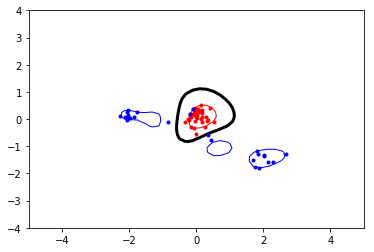

In [97]:
xgrid=numpy.linspace(-5, 5)
ygrid=numpy.linspace(-4, 4)
grid=numpy.array([[indicator(x, y, kernel) for x in xgrid ] for y in ygrid])
print(grid)
plt.plot([p[0] for p in classB],
        [p[1] for p in classB],
        'r.')
plt.plot([p[0] for p in classA],
        [p[1] for p in classA],
        'b.')

plt.contour(xgrid , ygrid, grid, (-1.0, 0.0, 1.0),
            colors=('red', 'black', 'blue'), 
            linewidths=(1, 3, 1))